In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)


In [2]:
(X_train_full, Y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255.0
x_test = x_test / 255.0
x_valid, x_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]

In [3]:
#Need to scale the inputs to a mean of 0, with a standard deviation of 1
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)

x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

In [4]:
def set_random():
    tf.random.set_seed(42)
    np.random.seed(42)
    return None
set_random()

In [5]:
# Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Graph Saving
PROJECT_ROOT_DIR = "./graphs"
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Dealing w/ Vanishing/Exploding Gradients

In [3]:
#list of different weight initializers
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [5]:
#pre-declared initializer w/ more customization

#he_normal w/ uniform distribution, using the fan_average (glort/xaiver init)
init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg',
                                                distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

In [4]:
#simple use of initalizer
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

# Activation Functions variations

RELU's (rectified linear unit) suffer from 'dying neuron', other options include:

In [6]:
#Leaky RELU manual creation (also part of keras.activations)
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

In [7]:
# selection of other activation functions
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [8]:
#RELU alterations
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

### Leaky Rectified Linear Unit 

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 114us/sample - loss: 1.2810 - accuracy: 0.6205 - val_loss: 0.8869 - val_accuracy: 0.7160
Epoch 2/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.7952 - accuracy: 0.7369 - val_loss: 0.7132 - val_accuracy: 0.7626
Epoch 3/10
55000/55000 [==============================] - 5s 92us/sample - loss: 0.6817 - accuracy: 0.7726 - val_loss: 0.6385 - val_accuracy: 0.7896
Epoch 4/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.6219 - accuracy: 0.7942 - val_loss: 0.5931 - val_accuracy: 0.8016
Epoch 5/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.5829 - accuracy: 0.8074 - val_loss: 0.5607 - val_accuracy: 0.8166
Epoch 6/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.5552 - accuracy: 0.8173 - val_loss: 0.5355 - val_accuracy: 0.8240
Epoch 7/10
55000/55000 [==============================] 

In [13]:
#LeakyRELU
mse_test = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.5154 - accuracy: 0.8259


### Parameteric Rectified Linear Unit (PRelu)

In [14]:
set_random()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
    
])

model.compile(loss='sparse_categorical_crossentropy', 
             optimizer= keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 104us/sample - loss: 1.3452 - accuracy: 0.6203 - val_loss: 0.9241 - val_accuracy: 0.7170
Epoch 2/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.8196 - accuracy: 0.7364 - val_loss: 0.7313 - val_accuracy: 0.7598
Epoch 3/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.6969 - accuracy: 0.7700 - val_loss: 0.6516 - val_accuracy: 0.7882
Epoch 4/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.6333 - accuracy: 0.7915 - val_loss: 0.6032 - val_accuracy: 0.8054
Epoch 5/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5916 - accuracy: 0.8049 - val_loss: 0.5689 - val_accuracy: 0.8160
Epoch 6/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5619 - accuracy: 0.8144 - val_loss: 0.5416 - val_accuracy: 0.8228
Epoch 7/10
55000/55000 [==============================] 

In [16]:
#PRelu
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.5153 - accuracy: 0.8245


[0.5152998466014862, 0.8245]

### Exponential Linear Units (ELU)

In [17]:
#visualization
z = np.linspace(-5, 5, 200)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

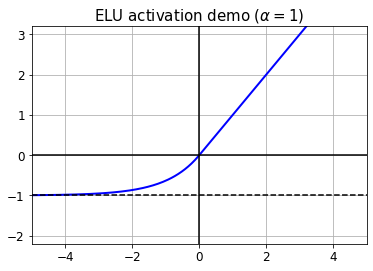

In [18]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation demo ($\alpha=1$)", fontsize=15)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [19]:
#utilizing ELU 
keras.layers.Dense(10, activation='elu')

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='elu'),
    keras.layers.Dense(100, activation='elu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer= keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 94us/sample - loss: 1.1400 - accuracy: 0.6525 - val_loss: 0.8021 - val_accuracy: 0.7462
Epoch 2/10
55000/55000 [==============================] - 5s 92us/sample - loss: 0.7380 - accuracy: 0.7579 - val_loss: 0.6668 - val_accuracy: 0.7804
Epoch 3/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.6461 - accuracy: 0.7858 - val_loss: 0.6059 - val_accuracy: 0.8012
Epoch 4/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.5966 - accuracy: 0.8008 - val_loss: 0.5682 - val_accuracy: 0.8132
Epoch 5/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.5641 - accuracy: 0.8100 - val_loss: 0.5411 - val_accuracy: 0.8198
Epoch 6/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.5410 - accuracy: 0.8152 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 7/10
55000/55000 [==============================] -

In [23]:
#elu
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.5097 - accuracy: 0.8202


[0.5097105376243591, 0.8202]

### Scaled exponential  linear unit (SELU)

during training with a leCun initalization with scaled exponential linear units will self-normalize, solving the problem of vanishing and exploding gradients. 

downsides: can't use regularization, dropout, max-normalization, skip connections (aka RNNs)

In [24]:
#implementing SELU
keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal')

In [25]:
set_random()

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))
#hundo layers of hundo neons
for layer in range(99):
    model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [29]:
history = model.fit(x_train_scaled, y_train, epochs=5, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 26s 466us/sample - loss: 1.0828 - accuracy: 0.5751 - val_loss: 0.8131 - val_accuracy: 0.6756
Epoch 2/5
55000/55000 [==============================] - 23s 423us/sample - loss: 0.7160 - accuracy: 0.7326 - val_loss: 0.5939 - val_accuracy: 0.7852
Epoch 3/5
55000/55000 [==============================] - 23s 423us/sample - loss: 0.5887 - accuracy: 0.7851 - val_loss: 0.5875 - val_accuracy: 0.7904
Epoch 4/5
55000/55000 [==============================] - 23s 426us/sample - loss: 0.5369 - accuracy: 0.8052 - val_loss: 0.5551 - val_accuracy: 0.8090
Epoch 5/5
55000/55000 [==============================] - 23s 413us/sample - loss: 0.5135 - accuracy: 0.8179 - val_loss: 0.6958 - val_accuracy: 0.7352


In [30]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 2s 189us/sample - loss: 0.7246 - accuracy: 0.7274


[0.7245925815582276, 0.7274]

### Previous architecture w/ RELU

In [31]:
set_random()

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [34]:
history = model.fit(x_train_scaled, y_train, epochs=5, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 23s 413us/sample - loss: 1.7822 - accuracy: 0.2732 - val_loss: 1.1945 - val_accuracy: 0.4636
Epoch 2/5
55000/55000 [==============================] - 21s 389us/sample - loss: 1.1452 - accuracy: 0.5130 - val_loss: 0.9559 - val_accuracy: 0.6098
Epoch 3/5
55000/55000 [==============================] - 20s 373us/sample - loss: 0.9717 - accuracy: 0.6033 - val_loss: 1.0026 - val_accuracy: 0.5730
Epoch 4/5
55000/55000 [==============================] - 21s 380us/sample - loss: 0.8138 - accuracy: 0.6735 - val_loss: 0.6852 - val_accuracy: 0.7364
Epoch 5/5
55000/55000 [==============================] - 21s 374us/sample - loss: 0.8367 - accuracy: 0.6733 - val_loss: 0.7549 - val_accuracy: 0.7224


In [35]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 143us/sample - loss: 0.7812 - accuracy: 0.7147


[0.7812127910614014, 0.7147]

# Batch Normalization

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])


In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_215 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_216 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_217 (Dense)            (None, 10)               

In [38]:
batch_normalization_1 = model.layers[1]
[(var.name, var.trainable) for var in batch_normalization_1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [39]:
batch_normalization_1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [40]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer= keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 154us/sample - loss: 0.8761 - accuracy: 0.7122 - val_loss: 0.5510 - val_accuracy: 0.8232
Epoch 2/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.5737 - accuracy: 0.8037 - val_loss: 0.4723 - val_accuracy: 0.8454
Epoch 3/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.5142 - accuracy: 0.8230 - val_loss: 0.4376 - val_accuracy: 0.8576
Epoch 4/10
55000/55000 [==============================] - 8s 138us/sample - loss: 0.4826 - accuracy: 0.8329 - val_loss: 0.4134 - val_accuracy: 0.8638
Epoch 5/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.4570 - accuracy: 0.8415 - val_loss: 0.3989 - val_accuracy: 0.8648
Epoch 6/10
55000/55000 [==============================] - 7s 132us/sample - loss: 0.4432 - accuracy: 0.8457 - val_loss: 0.3869 - val_accuracy: 0.8708
Epoch 7/10
55000/55000 [===========================

In [42]:
# sometimes BN works better before the activation function, sert use_bias = False
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [44]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 140us/sample - loss: 1.0334 - accuracy: 0.6755 - val_loss: 0.6738 - val_accuracy: 0.7832
Epoch 2/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.6761 - accuracy: 0.7820 - val_loss: 0.5562 - val_accuracy: 0.8194
Epoch 3/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.5929 - accuracy: 0.8056 - val_loss: 0.5006 - val_accuracy: 0.8368
Epoch 4/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.5467 - accuracy: 0.8159 - val_loss: 0.4652 - val_accuracy: 0.8452
Epoch 5/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.5114 - accuracy: 0.8269 - val_loss: 0.4427 - val_accuracy: 0.8514
Epoch 6/10
55000/55000 [==============================] - 9s 170us/sample - loss: 0.4903 - accuracy: 0.8334 - val_loss: 0.4264 - val_accuracy: 0.8542
Epoch 7/10
55000/55000 [===========================

# Simple use of gradient clipping

In [45]:
optimzier = keras.optimizers.SGD(clipvalue=1.0)


In [46]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Pretrained Layers

In [47]:
set_random()

In [48]:
#split the training set into two groups 
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))


(x_train_A, y_train_A), (x_train_B, y_train_B) = split_dataset(x_train, y_train)
(x_valid_A, y_valid_A), (x_valid_B, y_valid_B) = split_dataset(x_valid, y_valid)
(x_test_A, y_test_A), (x_test_B, y_test_B) = split_dataset(x_test, y_test)
x_train_B = x_train_B[:200]
y_train_B = y_train_B[:200]

In [49]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
# creates a 300 layer neuron layer, 100 n, etc.
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [50]:
model_A.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_221 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_222 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_223 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_224 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_225 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_226 (Dense)            (None, 8)                

In [51]:
model_A.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [52]:
history = model_A.fit(x_train_A, y_train_A, epochs=20, validation_data=(x_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 4s 98us/sample - loss: 0.5902 - accuracy: 0.8130 - val_loss: 0.3782 - val_accuracy: 0.8690
Epoch 2/20
43986/43986 [==============================] - 4s 95us/sample - loss: 0.3517 - accuracy: 0.8785 - val_loss: 0.3371 - val_accuracy: 0.8837
Epoch 3/20
43986/43986 [==============================] - 4s 100us/sample - loss: 0.3162 - accuracy: 0.8896 - val_loss: 0.3016 - val_accuracy: 0.8959
Epoch 4/20
43986/43986 [==============================] - 5s 125us/sample - loss: 0.2969 - accuracy: 0.8973 - val_loss: 0.2912 - val_accuracy: 0.9028
Epoch 5/20
43986/43986 [==============================] - 5s 117us/sample - loss: 0.2831 - accuracy: 0.9026 - val_loss: 0.2816 - val_accuracy: 0.9016
Epoch 6/20
43986/43986 [==============================] - 7s 159us/sample - loss: 0.2725 - accuracy: 0.9066 - val_loss: 0.2736 - val_accuracy: 0.9073
Epoch 7/20
43986/43986 [=============================

In [53]:
model_A.save('model_a.h5')

In [54]:
#slightly different model, utilizing the sigmoid function as an exit
model_b = keras.models.Sequential()
model_b.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_b.add(keras.layers.Dense(n_hidden, activation='selu'))
model_b.add(keras.layers.Dense(1, activation='sigmoid'))

In [55]:
model_b.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=['accuracy'])

In [56]:
history = model_b.fit(x_train_B, y_train_B, epochs=20, validation_data=(x_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.9509 - accuracy: 0.4800 - val_loss: 0.6533 - val_accuracy: 0.5568
Epoch 2/20
200/200 [==============================] - 0s 304us/sample - loss: 0.5837 - accuracy: 0.7100 - val_loss: 0.4825 - val_accuracy: 0.8479
Epoch 3/20
200/200 [==============================] - 0s 340us/sample - loss: 0.4527 - accuracy: 0.8750 - val_loss: 0.4097 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 497us/sample - loss: 0.3869 - accuracy: 0.9050 - val_loss: 0.3630 - val_accuracy: 0.9209
Epoch 5/20
200/200 [==============================] - 0s 369us/sample - loss: 0.3404 - accuracy: 0.9300 - val_loss: 0.3302 - val_accuracy: 0.9280
Epoch 6/20
200/200 [==============================] - 0s 466us/sample - loss: 0.3073 - accuracy: 0.9350 - val_loss: 0.3026 - val_accuracy: 0.9381
Epoch 7/20
200/200 [==============================] - 0s 495us/sample - loss: 0.

#### model a and b combo,  

In [57]:
#combining the models
model_A = keras.models.load_model('model_a.h5')
#grab all except for the exit layer
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
#apply last layer with sigmoid
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

 prevent all the layers from model_a from being trained, bc during intial training since the errors will be quite large, otherwise the weights will be changed in the earlier layers

In [58]:
#prevent training during first iterations
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    
model_B_on_A.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=['accuracy'])

In [59]:
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=4, validation_data=(x_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 2ms/sample - loss: 0.5650 - accuracy: 0.6650 - val_loss: 0.5694 - val_accuracy: 0.6531
Epoch 2/4
200/200 [==============================] - 0s 276us/sample - loss: 0.5278 - accuracy: 0.7050 - val_loss: 0.5361 - val_accuracy: 0.6947
Epoch 3/4
200/200 [==============================] - 0s 415us/sample - loss: 0.4950 - accuracy: 0.7400 - val_loss: 0.5060 - val_accuracy: 0.7160
Epoch 4/4
200/200 [==============================] - 0s 352us/sample - loss: 0.4655 - accuracy: 0.7600 - val_loss: 0.4794 - val_accuracy: 0.7383


In [60]:
#allow the weights to now be adjusted post-intial training of the combined model
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
    
model_B_on_A.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), 
                    metrics=['accuracy'])
model_B_on_A.fit(x_train_B, y_train_B, epochs=16, validation_data=(x_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 0s 2ms/sample - loss: 0.3883 - accuracy: 0.8200 - val_loss: 0.3367 - val_accuracy: 0.8671
Epoch 2/16
200/200 [==============================] - 0s 319us/sample - loss: 0.2711 - accuracy: 0.9350 - val_loss: 0.2614 - val_accuracy: 0.9239
Epoch 3/16
200/200 [==============================] - 0s 366us/sample - loss: 0.2088 - accuracy: 0.9650 - val_loss: 0.2153 - val_accuracy: 0.9503
Epoch 4/16
200/200 [==============================] - 0s 405us/sample - loss: 0.1699 - accuracy: 0.9800 - val_loss: 0.1842 - val_accuracy: 0.9625
Epoch 5/16
200/200 [==============================] - 0s 352us/sample - loss: 0.1431 - accuracy: 0.9800 - val_loss: 0.1603 - val_accuracy: 0.9706
Epoch 6/16
200/200 [==============================] - 0s 426us/sample - loss: 0.1223 - accuracy: 0.9850 - val_loss: 0.1425 - val_accuracy: 0.9787
Epoch 7/16
200/200 [==============================] - 0s 441us/sample - loss: 0.

In [61]:
model_B_on_A.evaluate(x_test_B, y_test_B)

2000/2000 [==============================] - 0s 46us/sample - loss: 0.0698 - accuracy: 0.9925


[0.0697787880897522, 0.9925]

In [66]:
#comparison of the two models
(100 -97.05) / (100 - 99.25)
#almost 4 times better

3.933333333333337

## Cloning weights from one model to the next

In [64]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

# Other Optimizers (Faster)

In [67]:
momentum_optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [73]:
nestrov_accelerated_gradient_optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov= True)

In [69]:
adagrad_optimizer = keras.optimizers.Adagrad(lr=0.0001)

In [77]:
rmsprop_optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
#rho = intial decay rate

Beta_1 = momentum decay rate typically 0.9
Beta_2 = scaling decay rate typically initalized to 0.999

In [78]:
adam_optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [75]:
adamax_optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

In [76]:
#nestrov adam
nadam_optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling

### Power Scheduling:
   setting the learning rate as a function to the number of iterations

In [82]:
#default
power_scheduler = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=power_scheduler, metrics=['accuracy'])

In [81]:
n_epochs = 25
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 132us/sample - loss: 0.4887 - accuracy: 0.8295 - val_loss: 0.8514 - val_accuracy: 0.6974
Epoch 2/25
55000/55000 [==============================] - 7s 130us/sample - loss: 0.3821 - accuracy: 0.8639 - val_loss: 0.8081 - val_accuracy: 0.7328
Epoch 3/25
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3486 - accuracy: 0.8756 - val_loss: 0.7690 - val_accuracy: 0.7598
Epoch 4/25
55000/55000 [==============================] - 7s 128us/sample - loss: 0.3268 - accuracy: 0.8845 - val_loss: 0.7861 - val_accuracy: 0.7440
Epoch 5/25
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3103 - accuracy: 0.8881 - val_loss: 0.8373 - val_accuracy: 0.7040
Epoch 6/25
55000/55000 [==============================] - 8s 151us/sample - loss: 0.2977 - accuracy: 0.8931 - val_loss: 0.8091 - val_accuracy: 0.7240
Epoch 7/25
55000/55000 [===========================

### Exponential Scheduling:
    every 10 times the learning rate is reduced 

In [84]:
# exponential decay by epoch
def exponential_decay(learning_rate, s):
    def exponential_decay_fn(epoch):
        return learning_rate*0.1**(epoch /s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(learning_rate=0.01, s=20)

In [85]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 25

In [86]:
learning_rate_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid),
                   callbacks=[learning_rate_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 12s 213us/sample - loss: 0.8525 - accuracy: 0.7566 - val_loss: 0.6998 - val_accuracy: 0.7630
Epoch 2/25
55000/55000 [==============================] - 11s 201us/sample - loss: 0.6670 - accuracy: 0.7962 - val_loss: 0.7725 - val_accuracy: 0.7234
Epoch 3/25
55000/55000 [==============================] - 11s 196us/sample - loss: 0.6302 - accuracy: 0.8084 - val_loss: 0.6147 - val_accuracy: 0.8020
Epoch 4/25
55000/55000 [==============================] - 11s 199us/sample - loss: 0.5487 - accuracy: 0.8307 - val_loss: 0.6762 - val_accuracy: 0.8400
Epoch 5/25
55000/55000 [==============================] - 11s 196us/sample - loss: 0.4942 - accuracy: 0.8437 - val_loss: 0.4863 - val_accuracy: 0.8606
Epoch 6/25
55000/55000 [==============================] - 11s 198us/sample - loss: 0.4377 - accuracy: 0.8602 - val_loss: 0.4912 - val_accuracy: 0.8492
Epoch 7/25
55000/55000 [=====================

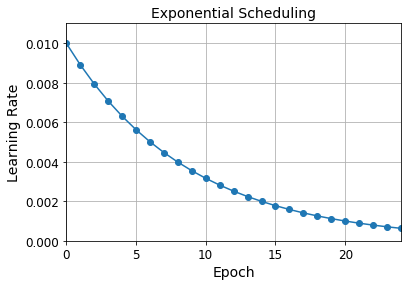

In [88]:
#visualization of the change of the learning curves
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs -1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()


In [96]:
#updating the learning rate on each iteration compared to each epoch
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
    #function names need to be exact to run
    def on_batch_begin(self, batch, logs= None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1/s))
        
    def on_epoch_end(self, epoch, logs=None):
        logs= logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)
        

In [97]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

learning_rate = 0.01 
optimizer = keras.optimizers.Nadam(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25

s = 20 * len(x_train) // 32 #the number of steps in 20 epochs with a batch size of 32
exp_decay = ExponentialDecay(s)

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid),
                   callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 34s 609us/sample - loss: 0.7972 - accuracy: 0.7657 - val_loss: 0.7054 - val_accuracy: 0.7094
Epoch 2/25
55000/55000 [==============================] - 32s 576us/sample - loss: 0.6656 - accuracy: 0.7985 - val_loss: 0.6093 - val_accuracy: 0.8108
Epoch 3/25
55000/55000 [==============================] - 30s 551us/sample - loss: 0.5741 - accuracy: 0.8208 - val_loss: 0.5821 - val_accuracy: 0.8092
Epoch 4/25
55000/55000 [==============================] - 33s 593us/sample - loss: 0.5184 - accuracy: 0.8371 - val_loss: 0.6780 - val_accuracy: 0.8416
Epoch 5/25
55000/55000 [==============================] - 33s 604us/sample - loss: 0.4665 - accuracy: 0.8508 - val_loss: 0.4713 - val_accuracy: 0.8492
Epoch 6/25
55000/55000 [==============================] - 31s 569us/sample - loss: 0.4376 - accuracy: 0.8596 - val_loss: 0.5338 - val_accuracy: 0.8500
Epoch 7/25
55000/55000 [=====================

### PIecewise Constant Scheduling

In [98]:
# Hard coded
def piecewise_constant_fn(epoch):
    if epoch< 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [106]:
#soft coded
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5,15], [0.01, 0.005, 0.001])

In [107]:
learning_rate_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [108]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
epoch_num = 25

history= model.fit(x_train_scaled, y_train, epochs=epoch_num, validation_data=(x_valid_scaled, y_valid), 
                  callbacks=[learning_rate_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 13s 230us/sample - loss: 0.8785 - accuracy: 0.7567 - val_loss: 0.7550 - val_accuracy: 0.7324
Epoch 2/25
55000/55000 [==============================] - 14s 253us/sample - loss: 0.9106 - accuracy: 0.7376 - val_loss: 0.9761 - val_accuracy: 0.7808
Epoch 3/25
55000/55000 [==============================] - 14s 262us/sample - loss: 0.9290 - accuracy: 0.7219 - val_loss: 0.7684 - val_accuracy: 0.7960
Epoch 4/25
55000/55000 [==============================] - 13s 235us/sample - loss: 0.7701 - accuracy: 0.7811 - val_loss: 0.8208 - val_accuracy: 0.8048
Epoch 5/25
55000/55000 [==============================] - 12s 217us/sample - loss: 0.7432 - accuracy: 0.7874 - val_loss: 0.8192 - val_accuracy: 0.7680
Epoch 6/25
55000/55000 [==============================] - 11s 197us/sample - loss: 0.5237 - accuracy: 0.8387 - val_loss: 0.6621 - val_accuracy: 0.8458
Epoch 7/25
55000/55000 [=====================

### Performance Scheduling:
   reducing learning rate when the error rate stops dropping

In [109]:
set_random()

In [110]:
#factor = amount to reduce by (lr* factor) 
#patience = number of epochs w/ no improvement
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience= 5)

In [111]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [112]:
epochs = 25
history = model.fit(x_train_scaled, y_train, epochs=epochs, validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 109us/sample - loss: 0.5949 - accuracy: 0.8070 - val_loss: 0.4849 - val_accuracy: 0.8474
Epoch 2/25
55000/55000 [==============================] - 6s 113us/sample - loss: 0.5248 - accuracy: 0.8335 - val_loss: 0.5306 - val_accuracy: 0.8420
Epoch 3/25
55000/55000 [==============================] - 8s 139us/sample - loss: 0.5129 - accuracy: 0.8417 - val_loss: 0.4877 - val_accuracy: 0.8458
Epoch 4/25
55000/55000 [==============================] - 10s 175us/sample - loss: 0.5123 - accuracy: 0.8465 - val_loss: 0.7664 - val_accuracy: 0.8408
Epoch 5/25
55000/55000 [==============================] - 8s 137us/sample - loss: 0.5127 - accuracy: 0.8520 - val_loss: 0.6294 - val_accuracy: 0.8406
Epoch 6/25
55000/55000 [==============================] - 6s 117us/sample - loss: 0.5032 - accuracy: 0.8539 - val_loss: 0.6202 - val_accuracy: 0.8528
Epoch 7/25
55000/55000 [==========================

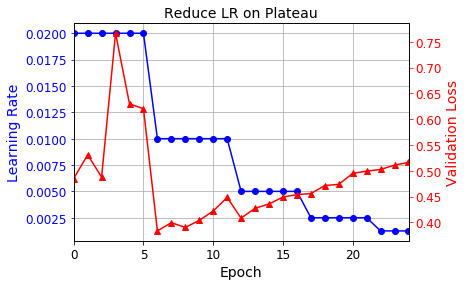

In [114]:
#Visualization of the performance learning scheduling technique

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### Easy implementation through tf.keras:

piecewise

In [116]:
n_steps_per_epoch = 10 #example
#piecewise function
piecewise_learning = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, .001])

exponential decay

In [118]:
exponential_learning = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)

## 1Cycle technique

Idea to increase the learning rate half way through the entire number of epochs, then decrease the learning rate through the second half. 

In [129]:
#visualizing the method
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
        
def find_learning_rate( model, x, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(x) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    
    history = model.fit(x, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_learning_rate_vs_loss(rate, losses):
    plt.plot(rate, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) /2])
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")

In [127]:
set_random()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

Train on 55000 samples
55000/55000 [==============================] - 2s 41us/sample - loss: nan - accuracy: 0.3901


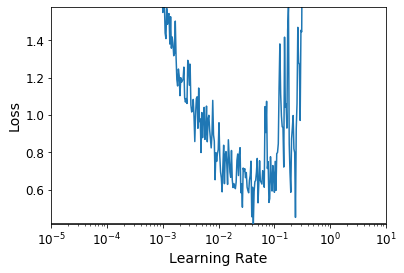

In [128]:
batch_size = 128
rates, losses = find_learning_rate(model, x_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_learning_rate_vs_loss(rates, losses)

Implementing the method

In [135]:
set_random()

In [138]:

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None, last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate /10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration =  (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
        
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2- rate1) * (self.iterations - iter1) / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        if self.iterations < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteartion < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iterations += 1
        K.set_value(self.model.optimizer.lr, rate)
        

In [140]:
number_epochs = 25
onecycle = OneCycleScheduler(len(x_train) // batch_size * number_epochs, max_rate=0.05)
history = model.fit(x_train_scaled, y_train, epochs= number_epochs, batch_size=batch_size,
                   validation_data=(x_valid_scaled, y_valid), callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 108us/sample - loss: 0.6576 - accuracy: 0.7743 - val_loss: 0.4901 - val_accuracy: 0.8300
Epoch 2/25
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4587 - accuracy: 0.8387 - val_loss: 0.4316 - val_accuracy: 0.8490
Epoch 3/25
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4119 - accuracy: 0.8560 - val_loss: 0.4117 - val_accuracy: 0.8580
Epoch 4/25
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3842 - accuracy: 0.8657 - val_loss: 0.3920 - val_accuracy: 0.8636
Epoch 5/25
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3636 - accuracy: 0.8708 - val_loss: 0.3739 - val_accuracy: 0.8710
Epoch 6/25
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3460 - accuracy: 0.8766 - val_loss: 0.3741 - val_accuracy: 0.8692
Epoch 7/25
55000/55000 [===========================

In [141]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3379 - accuracy: 0.8851


[0.3379229620754719, 0.8851]

# Using Regularization:
    to avoid overfitting

###  l1 and l2 regularization technique

In [143]:
#simple usage of just l2 reg on layer
layer = keras.layers.Dense(1, activation='relu', kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l2(0.01))

# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [145]:
#simple model using the l2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    #using the exponential linear unit activation function with it
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 229us/sample - loss: 1.5735 - accuracy: 0.8126 - val_loss: 0.7327 - val_accuracy: 0.8222
Epoch 2/2
55000/55000 [==============================] - 12s 215us/sample - loss: 0.7186 - accuracy: 0.8260 - val_loss: 0.6929 - val_accuracy: 0.8338


In [146]:
from functools import partial

#quick layer building
RegularizedDense = partial(keras.layers.Dense, 
                          activation='elu',
                          kernel_initializer='he_normal',
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [147]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history= model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 229us/sample - loss: 1.6006 - accuracy: 0.8129 - val_loss: 0.7374 - val_accuracy: 0.8236
Epoch 2/2
55000/55000 [==============================] - 12s 218us/sample - loss: 0.7179 - accuracy: 0.8265 - val_loss: 0.6905 - val_accuracy: 0.8356


## Dropout usage

In [156]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2), #20% dropout 
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax'),
    
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history= model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 11s 202us/sample - loss: 0.5686 - accuracy: 0.8031 - val_loss: 0.3809 - val_accuracy: 0.8608
Epoch 2/2
55000/55000 [==============================] - 11s 198us/sample - loss: 0.4212 - accuracy: 0.8466 - val_loss: 0.3379 - val_accuracy: 0.8760


In [155]:
set_random()


### alpha dropout:
   dropout that keeps the mean and variances of inputs of their original values

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
accuracy = ['accuracy']
loss = 'sparse_categorical_crossentropy'
n_epochs = 20
model.compile(loss=loss, optimizer=optimizer, metrics=accuracy)

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 8s 154us/sample - loss: 0.6614 - accuracy: 0.7614 - val_loss: 0.6682 - val_accuracy: 0.8262
Epoch 2/20
55000/55000 [==============================] - 7s 126us/sample - loss: 0.5526 - accuracy: 0.7971 - val_loss: 0.5835 - val_accuracy: 0.8370
Epoch 3/20
55000/55000 [==============================] - 7s 120us/sample - loss: 0.5261 - accuracy: 0.8066 - val_loss: 0.5318 - val_accuracy: 0.8532
Epoch 4/20
55000/55000 [==============================] - 7s 122us/sample - loss: 0.5077 - accuracy: 0.8113 - val_loss: 0.4917 - val_accuracy: 0.8614
Epoch 5/20
55000/55000 [==============================] - 7s 131us/sample - loss: 0.4934 - accuracy: 0.8180 - val_loss: 0.5006 - val_accuracy: 0.8588
Epoch 6/20
55000/55000 [==============================] - 7s 126us/sample - loss: 0.4835 - accuracy: 0.8194 - val_loss: 0.5177 - val_accuracy: 0.8534
Epoch 7/20
55000/55000 [===========================

In [11]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.5074 - accuracy: 0.8650


[0.5073673460304737, 0.865]

## MC Dropout:
     monte carlo, which is just essentially stacking predictions 

In [7]:
set_random()

In [8]:
#make 100 predictions on the model with test set
y_probas = np.stack([model(x_test_scaled, training=True) for sample in range(100)])

W0427 10:52:06.219471 139753668679488 base_layer.py:1790] Layer flatten is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [9]:
#take the mean of the 100 predictions 
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [10]:
#to view predictions, w/out dropout
np.round(model.predict(x_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
#prediction when the dropout is activated 
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.39, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.7 , 0.  , 0.29]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.01, 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.23, 0.03, 0.7 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.16, 0.  , 0.83]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.15, 0.  , 0.82]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.06, 0.  , 0.66]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.33, 0.  , 0.65]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.  , 0.05, 0.  , 0.58]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.26, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.1 , 0.  , 0

In [12]:
# No implementation yet
class MC_Dropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training= True)
    
class MC_Alpha_Dropout(keras.layers.AlphaDropout):
        def call(self, inputs):
            return super().call(inputs, training=True)

In [13]:
#looks like training = True, takes the previous model's architecture
mc_model = keras.models.Sequential([
    MC_Alpha_Dropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [14]:
mc_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
mc__alpha__dropout (MC_Alpha (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
mc__alpha__dropout_1 (MC_Alp (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
mc__alpha__dropout_2 (MC_Alp (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [16]:
optimizer.get_config() 

{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.9,
 'nesterov': True}

In [17]:
mc_model.compile(loss=loss, optimizer=optimizer, metrics=accuracy)

In [18]:
#update weights from the previous model
mc_model.set_weights(model.get_weights())

In [20]:
#use the mc dropout model, aggergated results 
np.round(np.mean([mc_model.predict(x_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.17, 0.  , 0.75]],
      dtype=float32)

### Max Norm 
    Takes the absolute value of the weights |w| < r (r hyperparameter for max-norm)
    -computed after each training step and rescaled if neccessary

In [21]:
max_norm_layer = keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal',
                                   kernel_constraint= keras.constraints.max_norm(1.))

In [26]:
from functools import partial
#partial function again, 
MaxNormDense = partial(keras.layers.Dense, activation='selu', kernel_initializer='lecun_normal', 
                      kernel_constraint= keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=loss, optimizer='nadam', metrics=accuracy)
n_epochs = 2

model.fit(x_train_scaled, y_train, epochs= n_epochs, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 12s 222us/sample - loss: 0.4729 - accuracy: 0.8336 - val_loss: 0.4022 - val_accuracy: 0.8578
Epoch 2/2
55000/55000 [==============================] - 11s 204us/sample - loss: 0.3564 - accuracy: 0.8686 - val_loss: 0.3439 - val_accuracy: 0.8746


rule of thumb for defaults:
kernel_init = HE normal
activation_fn = ELU
normalization = none
regularization = early stopping
optimizer = momentum 
learning rate schedule = 1 cycle